In [3]:
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt   
import seaborn as sns

In [6]:
df = pd.read_csv('table13.csv')

In [7]:
df.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1826 non-null   object 
 1   Agency type         1826 non-null   object 
 2   Agency name         1826 non-null   object 
 3   Race                1826 non-null   int64  
 4   Religion            1826 non-null   int64  
 5   Sexual orientation  1826 non-null   int64  
 6   Ethnicity           1826 non-null   int64  
 7   Disability          1826 non-null   int64  
 8   Gender              1824 non-null   object 
 9   Gender Identity     1824 non-null   float64
 10  1st quarter         1797 non-null   float64
 11  2nd quarter         1790 non-null   float64
 12  3rd quarter         1798 non-null   float64
 13  4th quarter         1782 non-null   float64
 14  Population          1434 non-null   object 
dtypes: float64(5), int64(5), object(5)
memory usage: 214.1+

In [9]:
df.describe()

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1824.000000,1797.000000,1790.000000,1798.000000,1782.000000
mean,1.572837,0.565170,0.677437,0.358708,0.045455,0.016996,0.703951,0.924581,0.932147,0.749719
std,4.081956,4.022999,3.195289,1.379308,0.365069,0.307587,2.250526,3.206061,3.262212,2.988503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,88.000000,152.000000,99.000000,36.000000,12.000000,12.000000,56.000000,84.000000,81.000000,93.000000


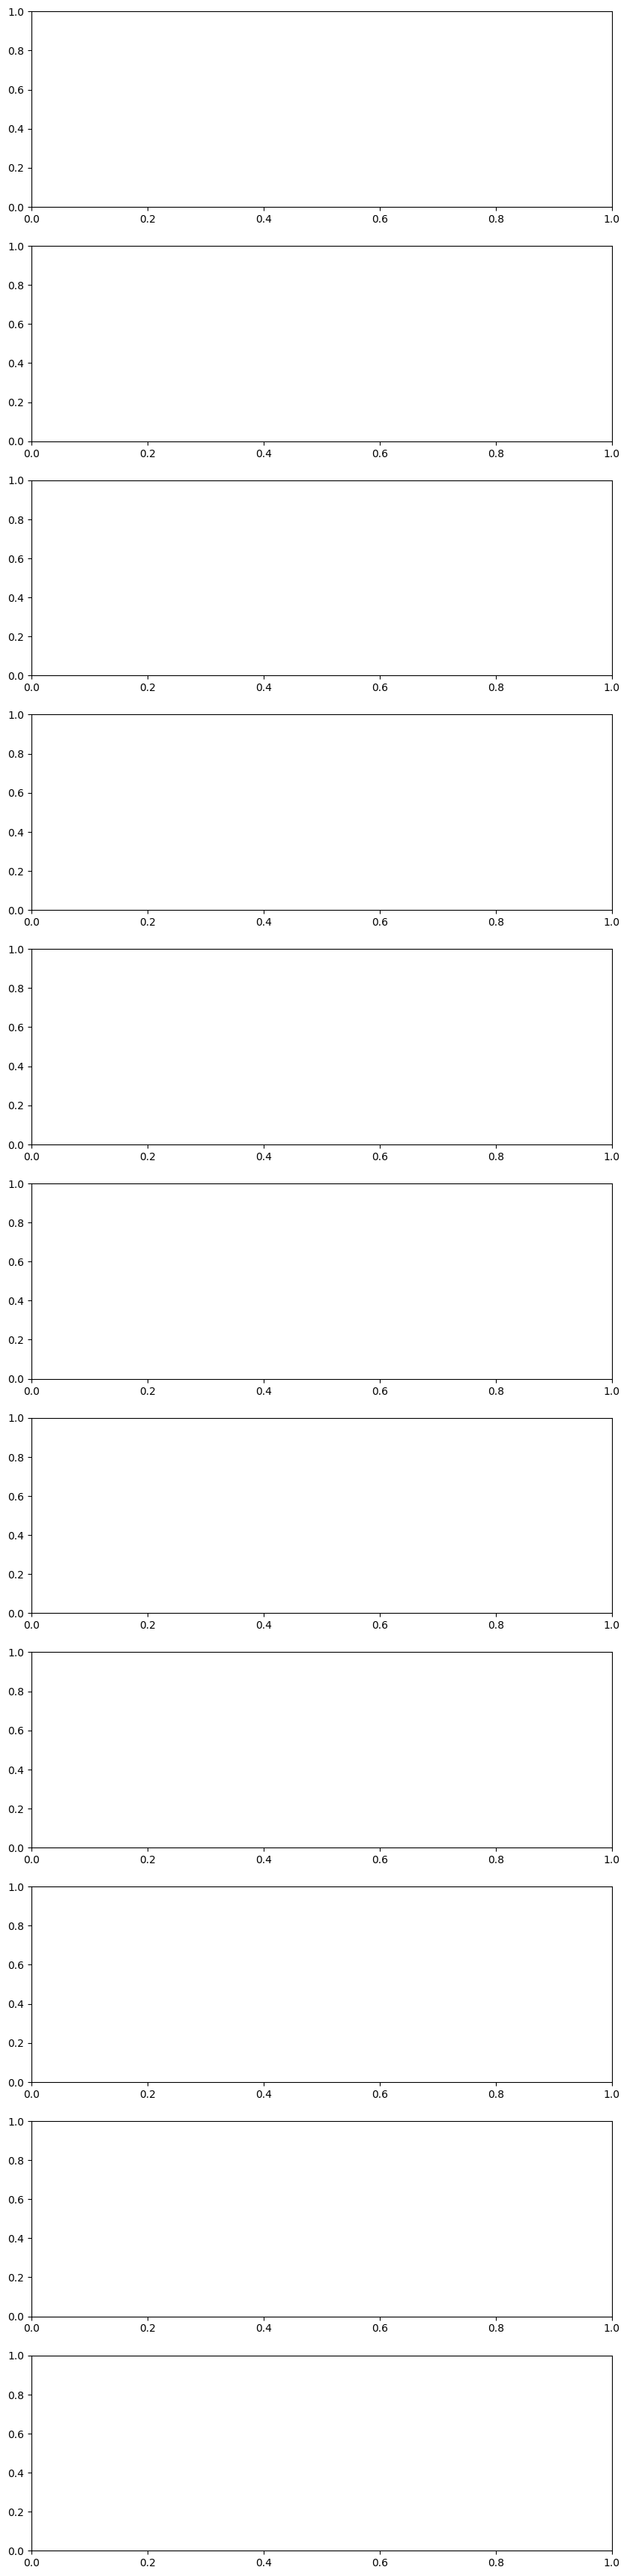

In [15]:
# set default matplotlib style and a nice seaborn color palette
plt.style.use('default')
sns.set_palette("husl")

# grab only numeric columns (ignore categorical stuff)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# handle Population column if it exists — make sure it's numeric
if 'Population' in df.columns:
    # convert to string first just in case, then remove commas and cast to float
    df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)
    
    # add it to numeric columns if it isn't already there
    if 'Population' not in numeric_columns:
        numeric_columns.append('Population')

# make one histogram per numeric column
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 4 * len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = [axes]  # keep things consistent when there’s only one plot

